In [1]:
#importing packages 

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [48]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
#dropping columns alive and alone 

In [50]:
df=df.drop('embarked',axis=1)

In [51]:
#checking for null values 

In [52]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [53]:
#handling embarked and embark_town 

In [54]:
df.deck

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [55]:
df['deck']=df.deck.replace('NaN','C')

In [56]:
df.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(4)
memory usage: 73.7+ KB


In [58]:
#converting class and deck into numeric as they describe a categorical data 
#using labelEncoder
from sklearn.preprocessing import LabelEncoder

In [59]:
le=LabelEncoder()

In [61]:
df['class']=le.fit_transform(df['class'])

In [62]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,2,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,0,man,True,C,Cherbourg,yes,True


In [71]:
df.drop('deck',axis=1,inplace=True)

In [72]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,2,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,0,man,True,Cherbourg,yes,True


In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [77]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [75]:
df.embark_town.fillna('JammuTown')

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [79]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [83]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,0,man,True,Cherbourg,yes,True


C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

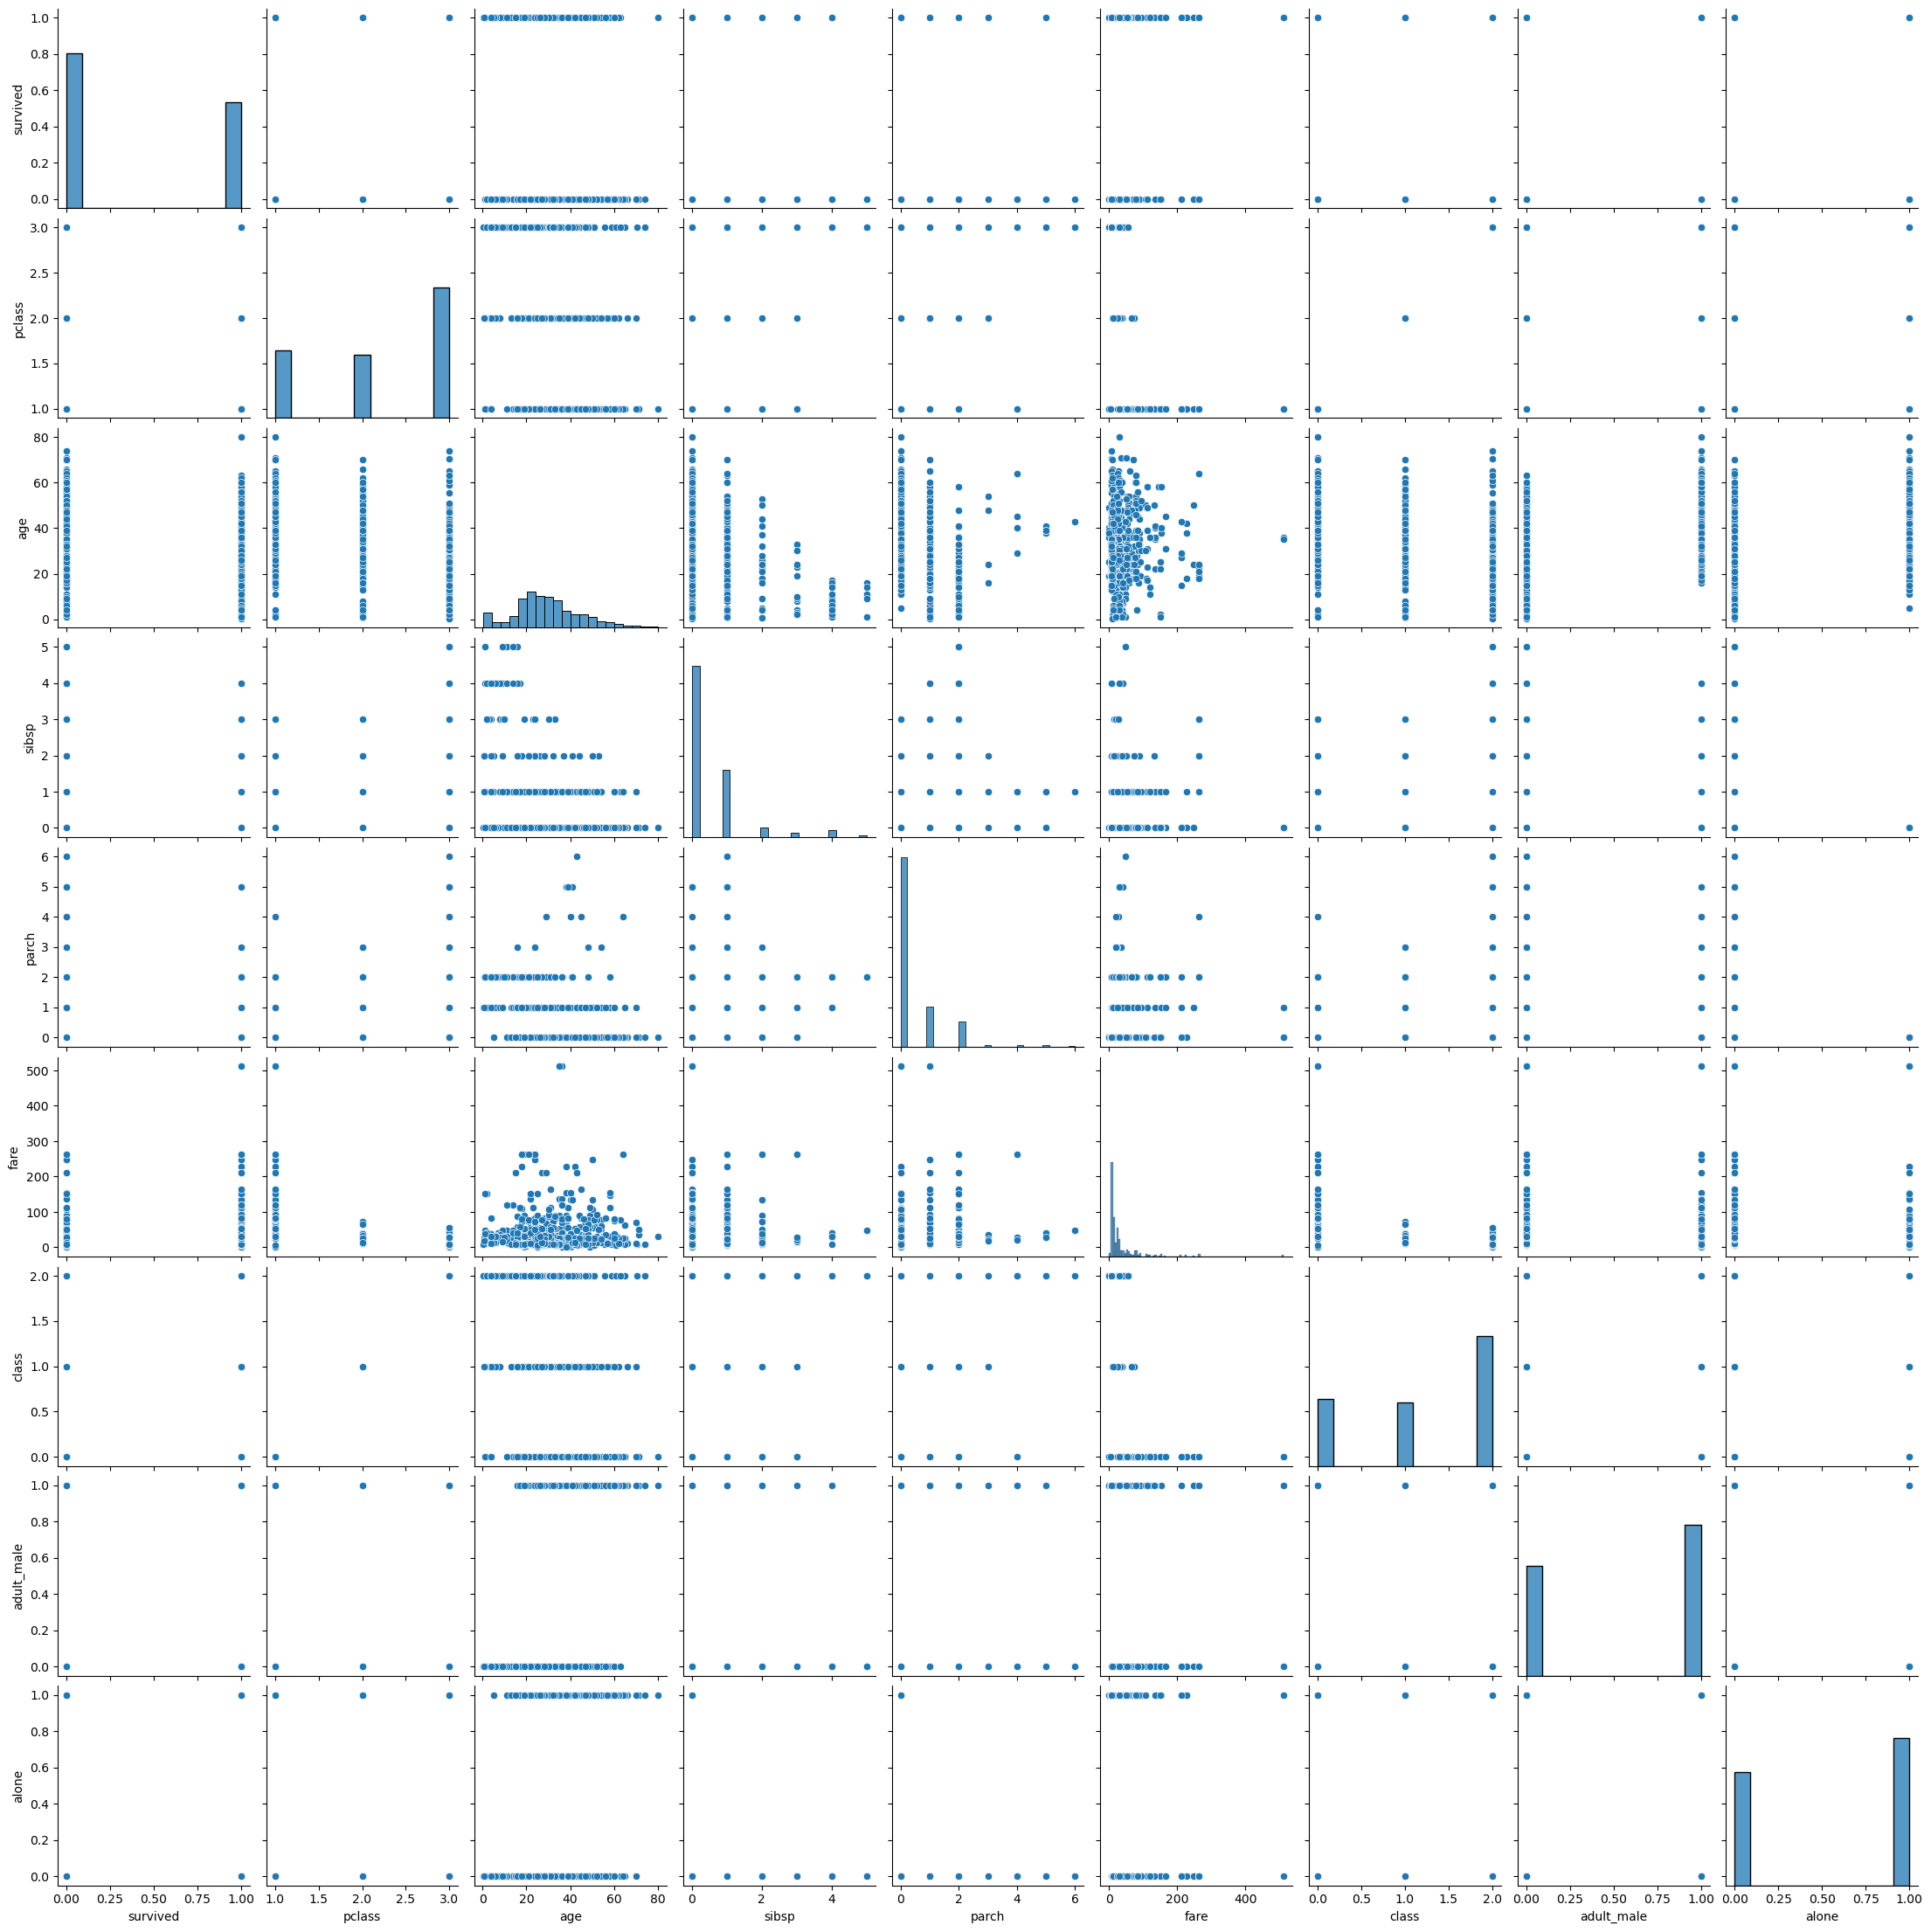

In [87]:
sns.pairplot(df)
plt.show()

C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

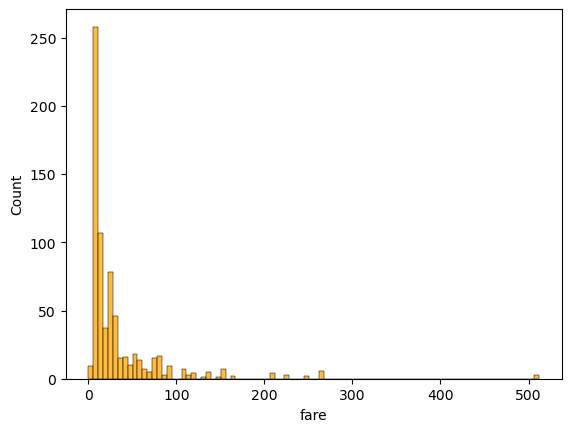

In [93]:
sns.histplot(x="fare",data=df,color="orange")

In [94]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,0,man,True,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='count'>

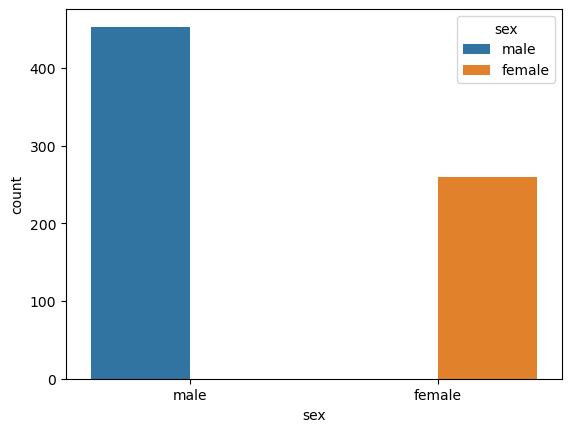

In [98]:

#count of male and female using count plot
sns.countplot(x="sex",data=df,hue="sex")

<Axes: xlabel='class', ylabel='count'>

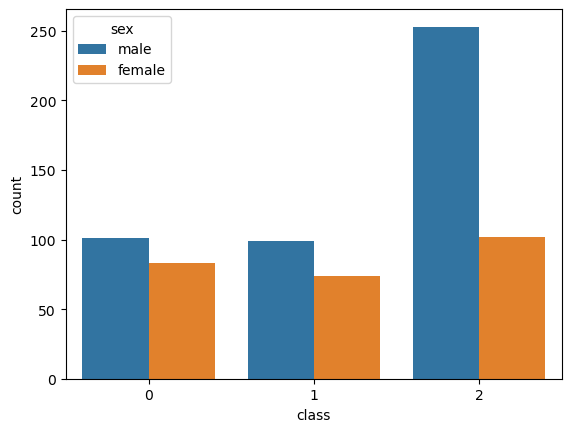

In [109]:
#count of people of different class 
sns.countplot(x="class",data=df,hue="sex")
#from the graph we can made an assumption that number of males in all the classes were more as well as we can made an assumption that 
# in Third class more number of male and female were there as compare to rest of other two classes

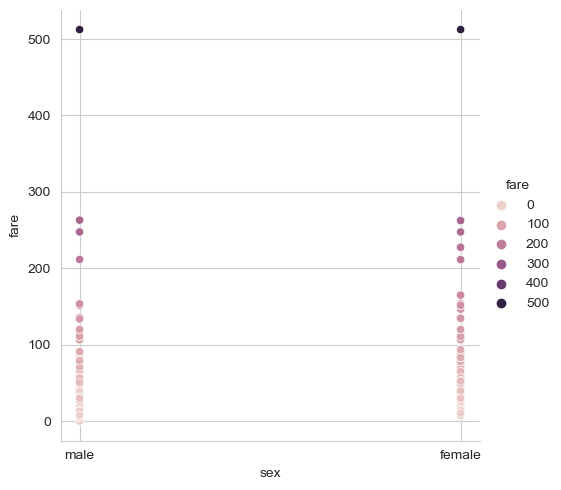

In [118]:
sns.set_style("whitegrid")
sns.relplot(x="sex",y="fare",data=df,hue="fare")
#from this graph we can made an assumption that more number of women pay the fare 

In [122]:
df.survived

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 712, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

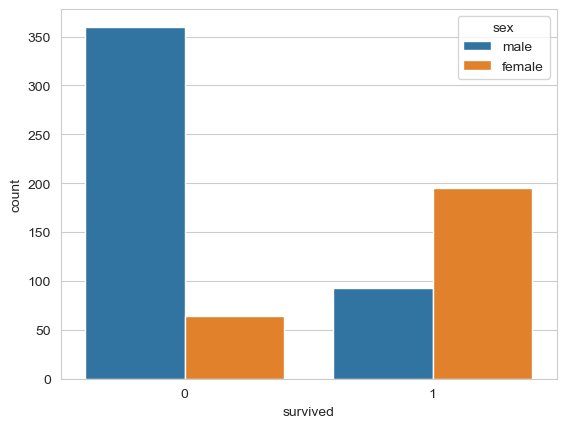

In [126]:
sns.countplot(x="survived",data=df,hue="sex")
#from the graph we can made an assumption that more number of womens were saved and more number of males were died

C:\Users\sarth\AppData\Local\Temp\ipykernel_8380\3151490134.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["survived"])
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='survived', ylabel='Density'>

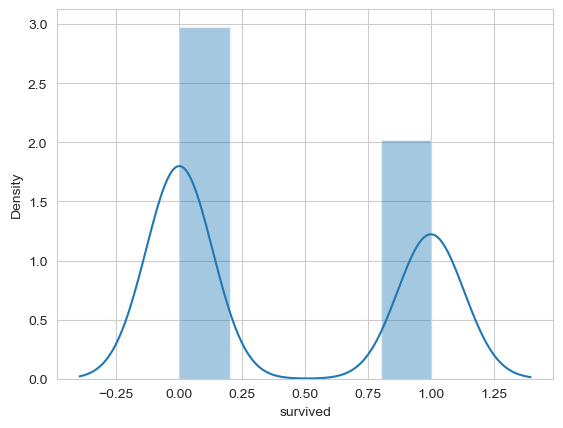

In [133]:
sns.distplot(df["survived"])

In [134]:
#Line plot 

C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='alive'>

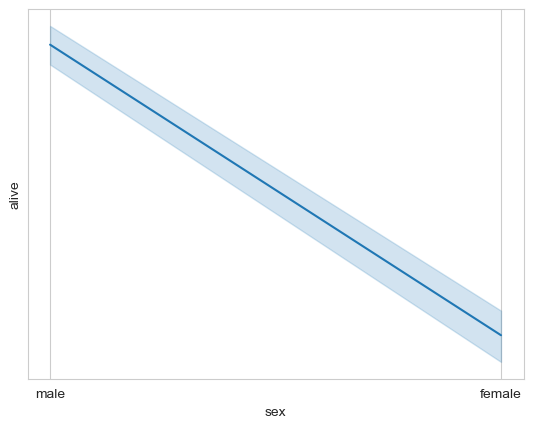

In [137]:
sns.lineplot(x="sex",y="alive",data=df)

<Axes: xlabel='alive', ylabel='count'>

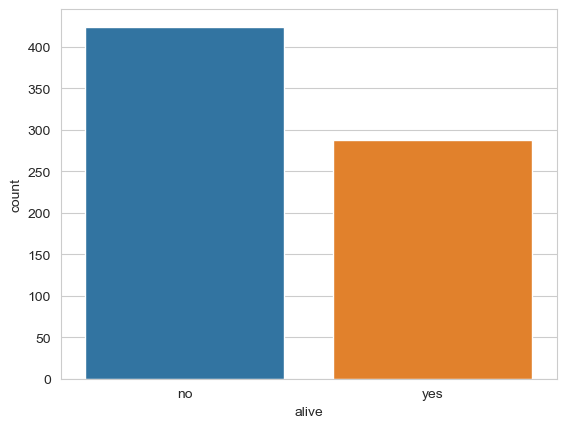

In [139]:
sns.countplot(x="alive",data=df)

In [141]:
#Finding relation between age and sex 

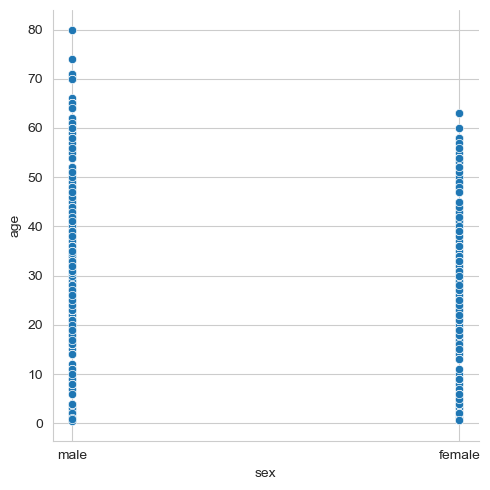

In [144]:
sns.relplot(x="sex",y="age",data=df)
#from this we can made an assumption that maximum age of male person was 80 and maximum age of female was 62 

<Axes: xlabel='alone', ylabel='count'>

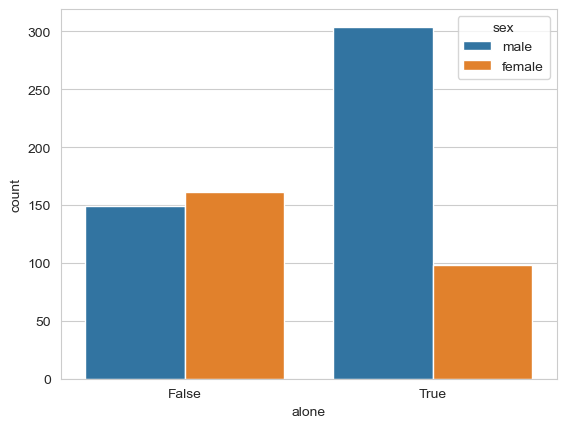

In [156]:
#finding relationship between class and gender
sns.countplot(x='alone',data=df,hue="sex")
#from the graph we can made an assumption that there were more male who were alone in titanic ship with no family

In [157]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,0,man,True,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='age'>

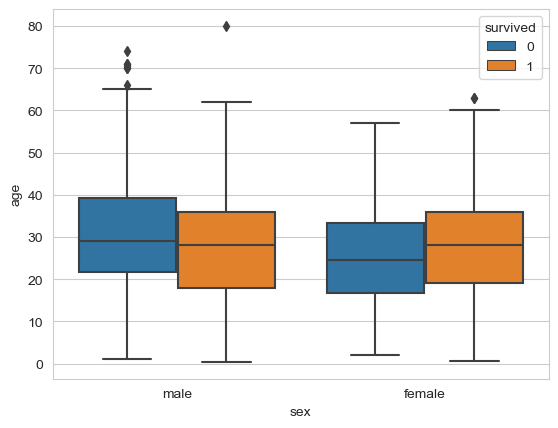

In [167]:
sns.boxplot(x="sex",y="age",data=df,hue="survived")
#from the box plot we can made an assumption that more females were survived in titanic incident 

<Axes: xlabel='sex', ylabel='age'>

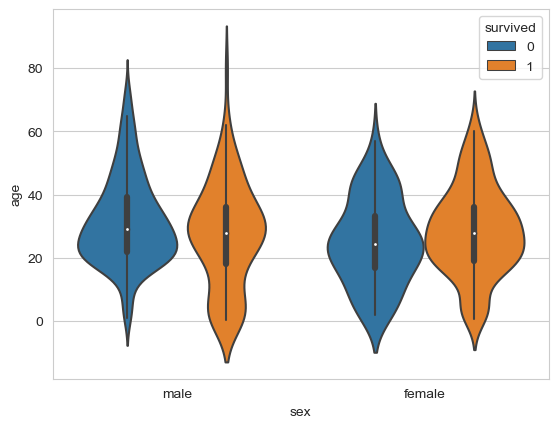

In [163]:
sns.violinplot(x="sex",y="age",data=df,hue="survived")

<Axes: xlabel='sex', ylabel='age'>

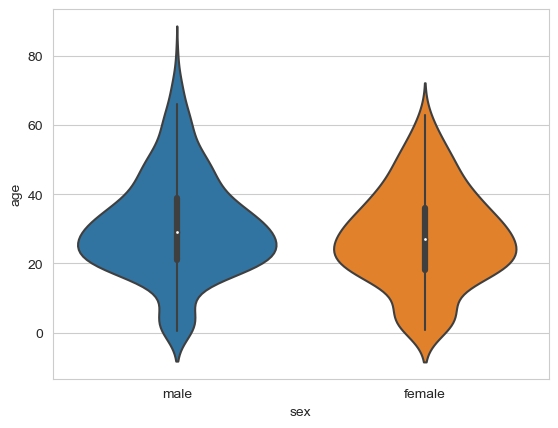

In [172]:
sns.violinplot(x="sex",y="age",data=df,split=True)

C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='survived'>

C:\Users\sarth\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


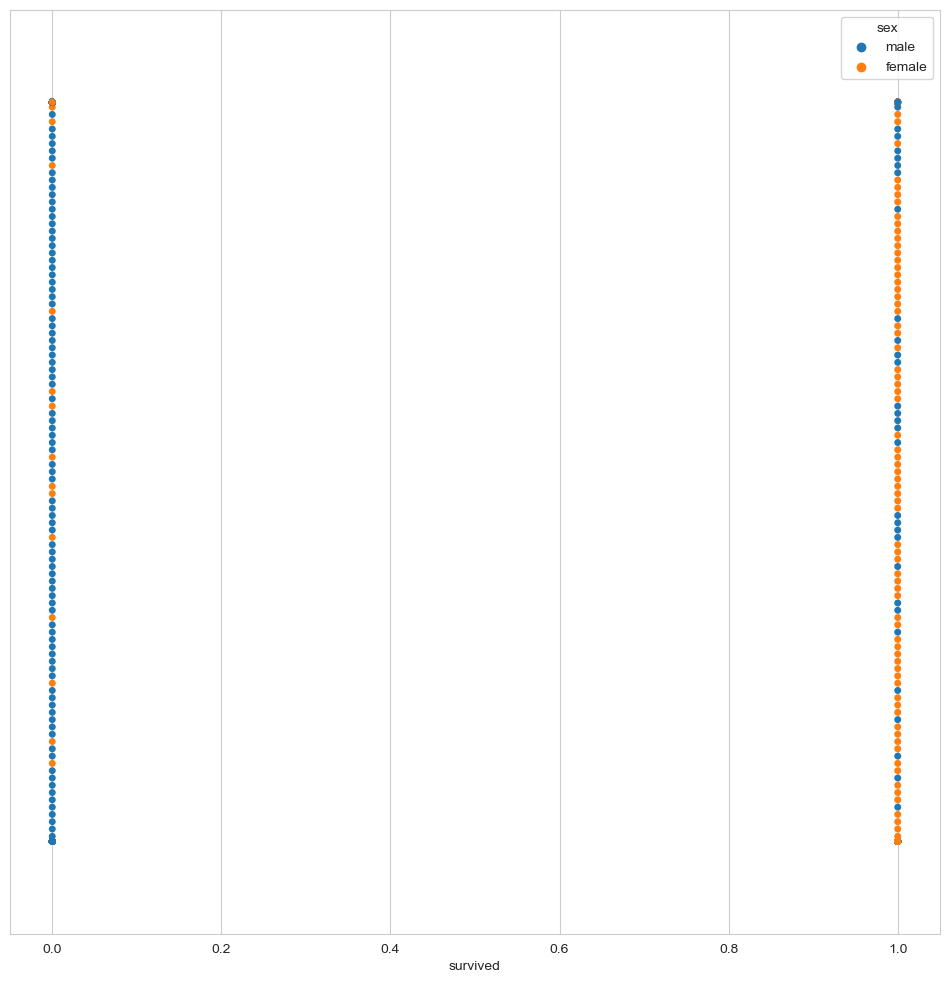

In [171]:
sns.swarmplot(x="survived",data=df,hue="sex")